Notebook to visualize how various calibrations compare.

In [1]:
import numpy as np

import pickle

from corner import corner

from matplotlib.patches import Patch

# Calibrations to compare

In [12]:
# "Version 9" calibration
# temp_infile = open('cov_ab_iron_jointTFR_varyV0-perpdwarfs0_z0p1_binaryMLupdated_Anthony_weightsVmax-1_dVsys_KAD-20250523.pickle', 'rb')
# cov_ab1, tfr_samples1, V01 = pickle.load(temp_infile)

# Aug. 13, 2025 calibration (v13)
temp_infile = open('cov_ab_iron_jointTFR_varyV0-dwarfsAlex_z0p1_zbins0p005_weightsVmax-1_dVsys_KAD-20250813.pickle', 'rb')
cov_ab1, tfr_samples1, logV01, zmin1, zmax1, dz1, zbins1 = pickle.load(temp_infile)

temp_infile.close()

In [13]:
# temp_infile = open('cov_ab_iron_jointTFR_varyV0-perpdwarfs0_z0p1_binaryMLupdated_Anthony_weightsVmax-1_dVsys_primarySNIa_KAD-20250605.pickle', 'rb')
# # temp_infile = open('cov_ab_iron_jointTFR_varyV0-perpdwarfs0_z0p1_binaryMLupdated_Anthony_weightsVmax-1_dVsys_noPairs_KAD-20250605.pickle', 'rb') # "Version 9" calibration w/o one of the two overlapping clusters
# # temp_infile = open('cov_ab_iron_jointTFR_varyV0-perpdwarfs0_z0p1_binaryMLupdated_Anthony_weightsVmax-1_dVsys_noOverlaps_KAD-20250605.pickle', 'rb') # "Version 9" calibration w/o any overlapping clusters
# cov_ab2, tfr_samples2, V02 = pickle.load(temp_infile)

# Oct. 30, 2025 calibration (v15)
temp_infile = open('cov_ab_iron_jointTFR_varyV0-dwarfsAlex_z0p1_zbins0p005_weightsVmax-1_dVsys_20251030.pickle', 'rb')
cov_ab2, tfr_samples2, logV02, zmin2, zmax2, dz2, zbins2 = pickle.load(temp_infile)

temp_infile.close()

In [28]:
# # temp_infile = open('cov_ab_iron_jointTFR_varyV0-perpdwarfs0_z0p1_binaryMLupdated_Anthony_weightsVmax-1_dVsys_noPairs_primarySN_KAD-20250606.pickle', 'rb') # "Version 9" calibration w/o one of the two overlapping clusters & only primary SNIa
# # temp_infile = open('cov_ab_iron_jointTFR_varyV0-perpdwarfs0_z0p1_binaryMLupdated_Anthony_weightsVmax-1_dVsys_noOverlaps_primarySN_KAD-20250606.pickle', 'rb')
# temp_infile = open('cov_ab_iron_jointTFR_varyV0-perpdwarfs0_z0p1_binaryMLupdated_Anthony_weightsVmax-1_dVsys_1p5R2t_KAD-20250606.pickle', 'rb') # "Version 9" calibration w/ just first cluster membership criteria
# cov_ab3, tfr_samples3, V03 = pickle.load(temp_infile)

# Aug. 10, 2025 calibration (v13 w/ one extra redshift bin)
temp_infile = open('cov_ab_iron_jointTFR_varyV0-dwarfsAlex_z0p1_zbins0p005_weightsVmax-1_dVsys_KAD-20250810.pickle', 'rb')
cov_ab3, tfr_samples3, logV03, zmin3, zmax3, dz3, zbins3 = pickle.load(temp_infile)

temp_infile.close()

In [6]:
# temp_infile = open('cov_ab_iron_jointTFR_varyV0-perpdwarfs0_z0p1_binaryMLupdated_Anthony_weightsVmax-1_dVsys_1p5R2t_primarySNIa_KAD-20250606.pickle', 'rb') # "Version 9" calibration w/ just first cluster membership criteria and only primary SNIa
# cov_ab4, tfr_samples4, V04 = pickle.load(temp_infile)
# temp_infile.close()

In [7]:
# temp_infile = open('cov_ab_iron_jointTFR_varyV0-perpdwarfs0_z0p1_binaryMLupdated_Anthony_weightsVmax-1_dVsys_noOverlaps_KAD-20250605.pickle', 'rb') # "Version 9" calibration w/o any overlapping clusters
# cov_ab5, tfr_samples5, V05 = pickle.load(temp_infile)
# temp_infile.close()

In [8]:
# temp_infile = open('cov_ab_iron_jointTFR_varyV0-perpdwarfs0_z0p1_binaryMLupdated_Anthony_weightsVmax-1_dVsys_noOverlaps_primarySN_KAD-20250606.pickle', 'rb')
# cov_ab6, tfr_samples6, V06 = pickle.load(temp_infile)
# temp_infile.close()

# Compare calibrations

## Calibrations are w/ zero-points

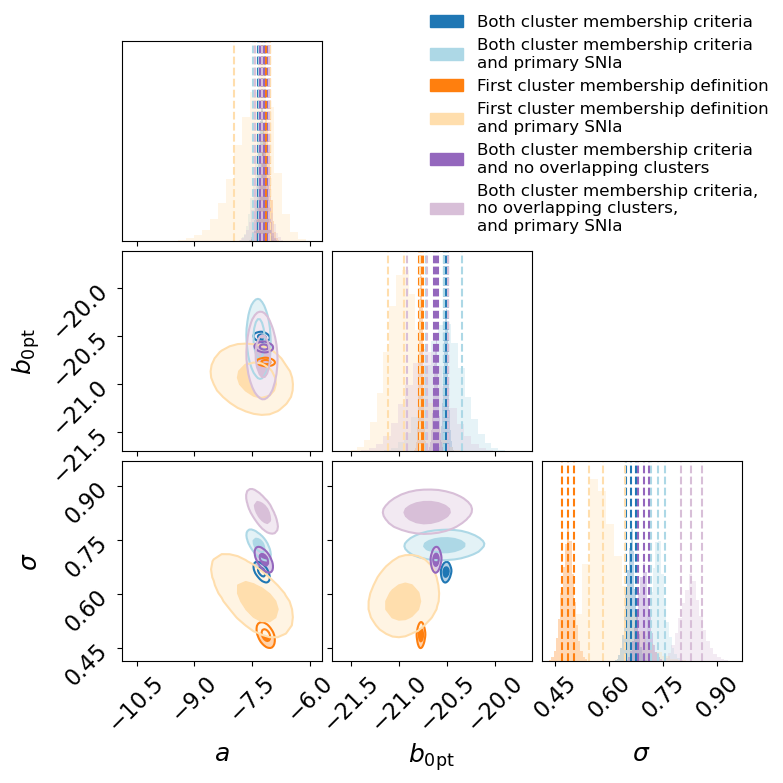

In [29]:
labels = ['$a$', '$b_{0\mathrm{pt}}$', r'$\sigma$']

param_indices1 = [0, 1, tfr_samples1.T.shape[1] - 1]
param_indices2 = [0, 1, tfr_samples2.T.shape[1] - 1]
param_indices3 = [0, 1, tfr_samples3.T.shape[1] - 1]
param_indices4 = [0, 1, tfr_samples4.T.shape[1] - 1]
param_indices5 = [0, 1, tfr_samples5.T.shape[1] - 1]
param_indices6 = [0, 1, tfr_samples6.T.shape[1] - 1]

color1 = 'tab:blue'
color2 = 'lightblue'
color3 = 'tab:orange'
color4 = 'navajowhite'
color5 = 'tab:purple'
color6 = 'thistle'

fig = corner(tfr_samples1.T[:, param_indices1], 
             bins=25, 
             smooth=1, 
             labels=labels, 
             label_kwargs={'fontsize':18}, 
             labelpad=0.1, 
             levels=(1-np.exp(-0.5), 1-np.exp(-2)), 
             quantiles=[0.16, 0.5, 0.84], 
             color=color1, 
             hist_kwargs={'histtype':'stepfilled', 'alpha':0.3}, 
             plot_datapoints=False, 
             fill_contours=True, 
             show_titles=False, 
             title_kwargs={'fontsize':18, 'loc':'left', 'pad':10}
            )

corner(tfr_samples2.T[:, param_indices2], 
       fig=fig, 
       bins=25, 
       smooth=1, 
       levels=(1-np.exp(-0.5), 1-np.exp(-2)), 
       quantiles=[0.16, 0.5, 0.84], 
       color=color2, 
       hist_kwargs={'histtype':'stepfilled', 'alpha':0.3}, 
       plot_datapoints=False, 
       fill_contours=True
      )

corner(tfr_samples3.T[:, param_indices3], 
       fig=fig, 
       bins=25, 
       smooth=1, 
       levels=(1-np.exp(-0.5), 1-np.exp(-2)), 
       quantiles=[0.16, 0.5, 0.84], 
       color=color3, 
       hist_kwargs={'histtype':'stepfilled', 'alpha':0.3}, 
       plot_datapoints=False, 
       fill_contours=True
      )

corner(tfr_samples4.T[:, param_indices4], 
       fig=fig, 
       bins=25, 
       smooth=1, 
       levels=(1-np.exp(-0.5), 1-np.exp(-2)), 
       quantiles=[0.16, 0.5, 0.84], 
       color=color4, 
       hist_kwargs={'histtype':'stepfilled', 'alpha':0.3}, 
       plot_datapoints=False, 
       fill_contours=True
      )

corner(tfr_samples5.T[:, param_indices5], 
       fig=fig, 
       bins=25, 
       smooth=1, 
       levels=(1-np.exp(-0.5), 1-np.exp(-2)), 
       quantiles=[0.16, 0.5, 0.84], 
       color=color5, 
       hist_kwargs={'histtype':'stepfilled', 'alpha':0.3}, 
       plot_datapoints=False, 
       fill_contours=True
      )

corner(tfr_samples6.T[:, param_indices6], 
       fig=fig, 
       bins=25, 
       smooth=1, 
       levels=(1-np.exp(-0.5), 1-np.exp(-2)), 
       quantiles=[0.16, 0.5, 0.84], 
       color=color6, 
       hist_kwargs={'histtype':'stepfilled', 'alpha':0.3}, 
       plot_datapoints=False, 
       fill_contours=True
      )

for ax in fig.get_axes():
    ax.tick_params(axis='both', which='major', labelsize=16)

# Create custom legend handles
legend_handles = [Patch(color=color1, label='Both cluster membership criteria'), 
                  Patch(color=color2, label='Both cluster membership criteria\nand primary SNIa'), 
                  Patch(color=color3, label='First cluster membership definition'), 
                  Patch(color=color4, label='First cluster membership definition\nand primary SNIa'), 
                  Patch(color=color5, label='Both cluster membership criteria\nand no overlapping clusters'),
                  Patch(color=color6, label='Both cluster membership criteria,\nno overlapping clusters,\nand primary SNIa')
                 ]

fig.legend(handles=legend_handles, loc='upper right', fontsize=12, frameon=False);

## Calibrations are based on redshift bins

In [29]:
print(len(zbins1), len(zbins2), len(zbins3))

15 15 16


In [30]:
values1 = np.median(tfr_samples1, axis=1)
sigmas1 = np.sqrt(np.diag(cov_ab1))

values2 = np.median(tfr_samples2, axis=1)
sigmas2 = np.sqrt(np.diag(cov_ab2))

values3 = np.median(tfr_samples3, axis=1)
sigmas3 = np.sqrt(np.diag(cov_ab3))

multiple = 3.5

limits = []

for i in range(len(values1)):
    limits.append([min(values1[i] - multiple*sigmas1[i], values2[i] - multiple*sigmas2[i]), 
                   max(values1[i] + multiple*sigmas1[i], values2[i] + multiple*sigmas2[i])])

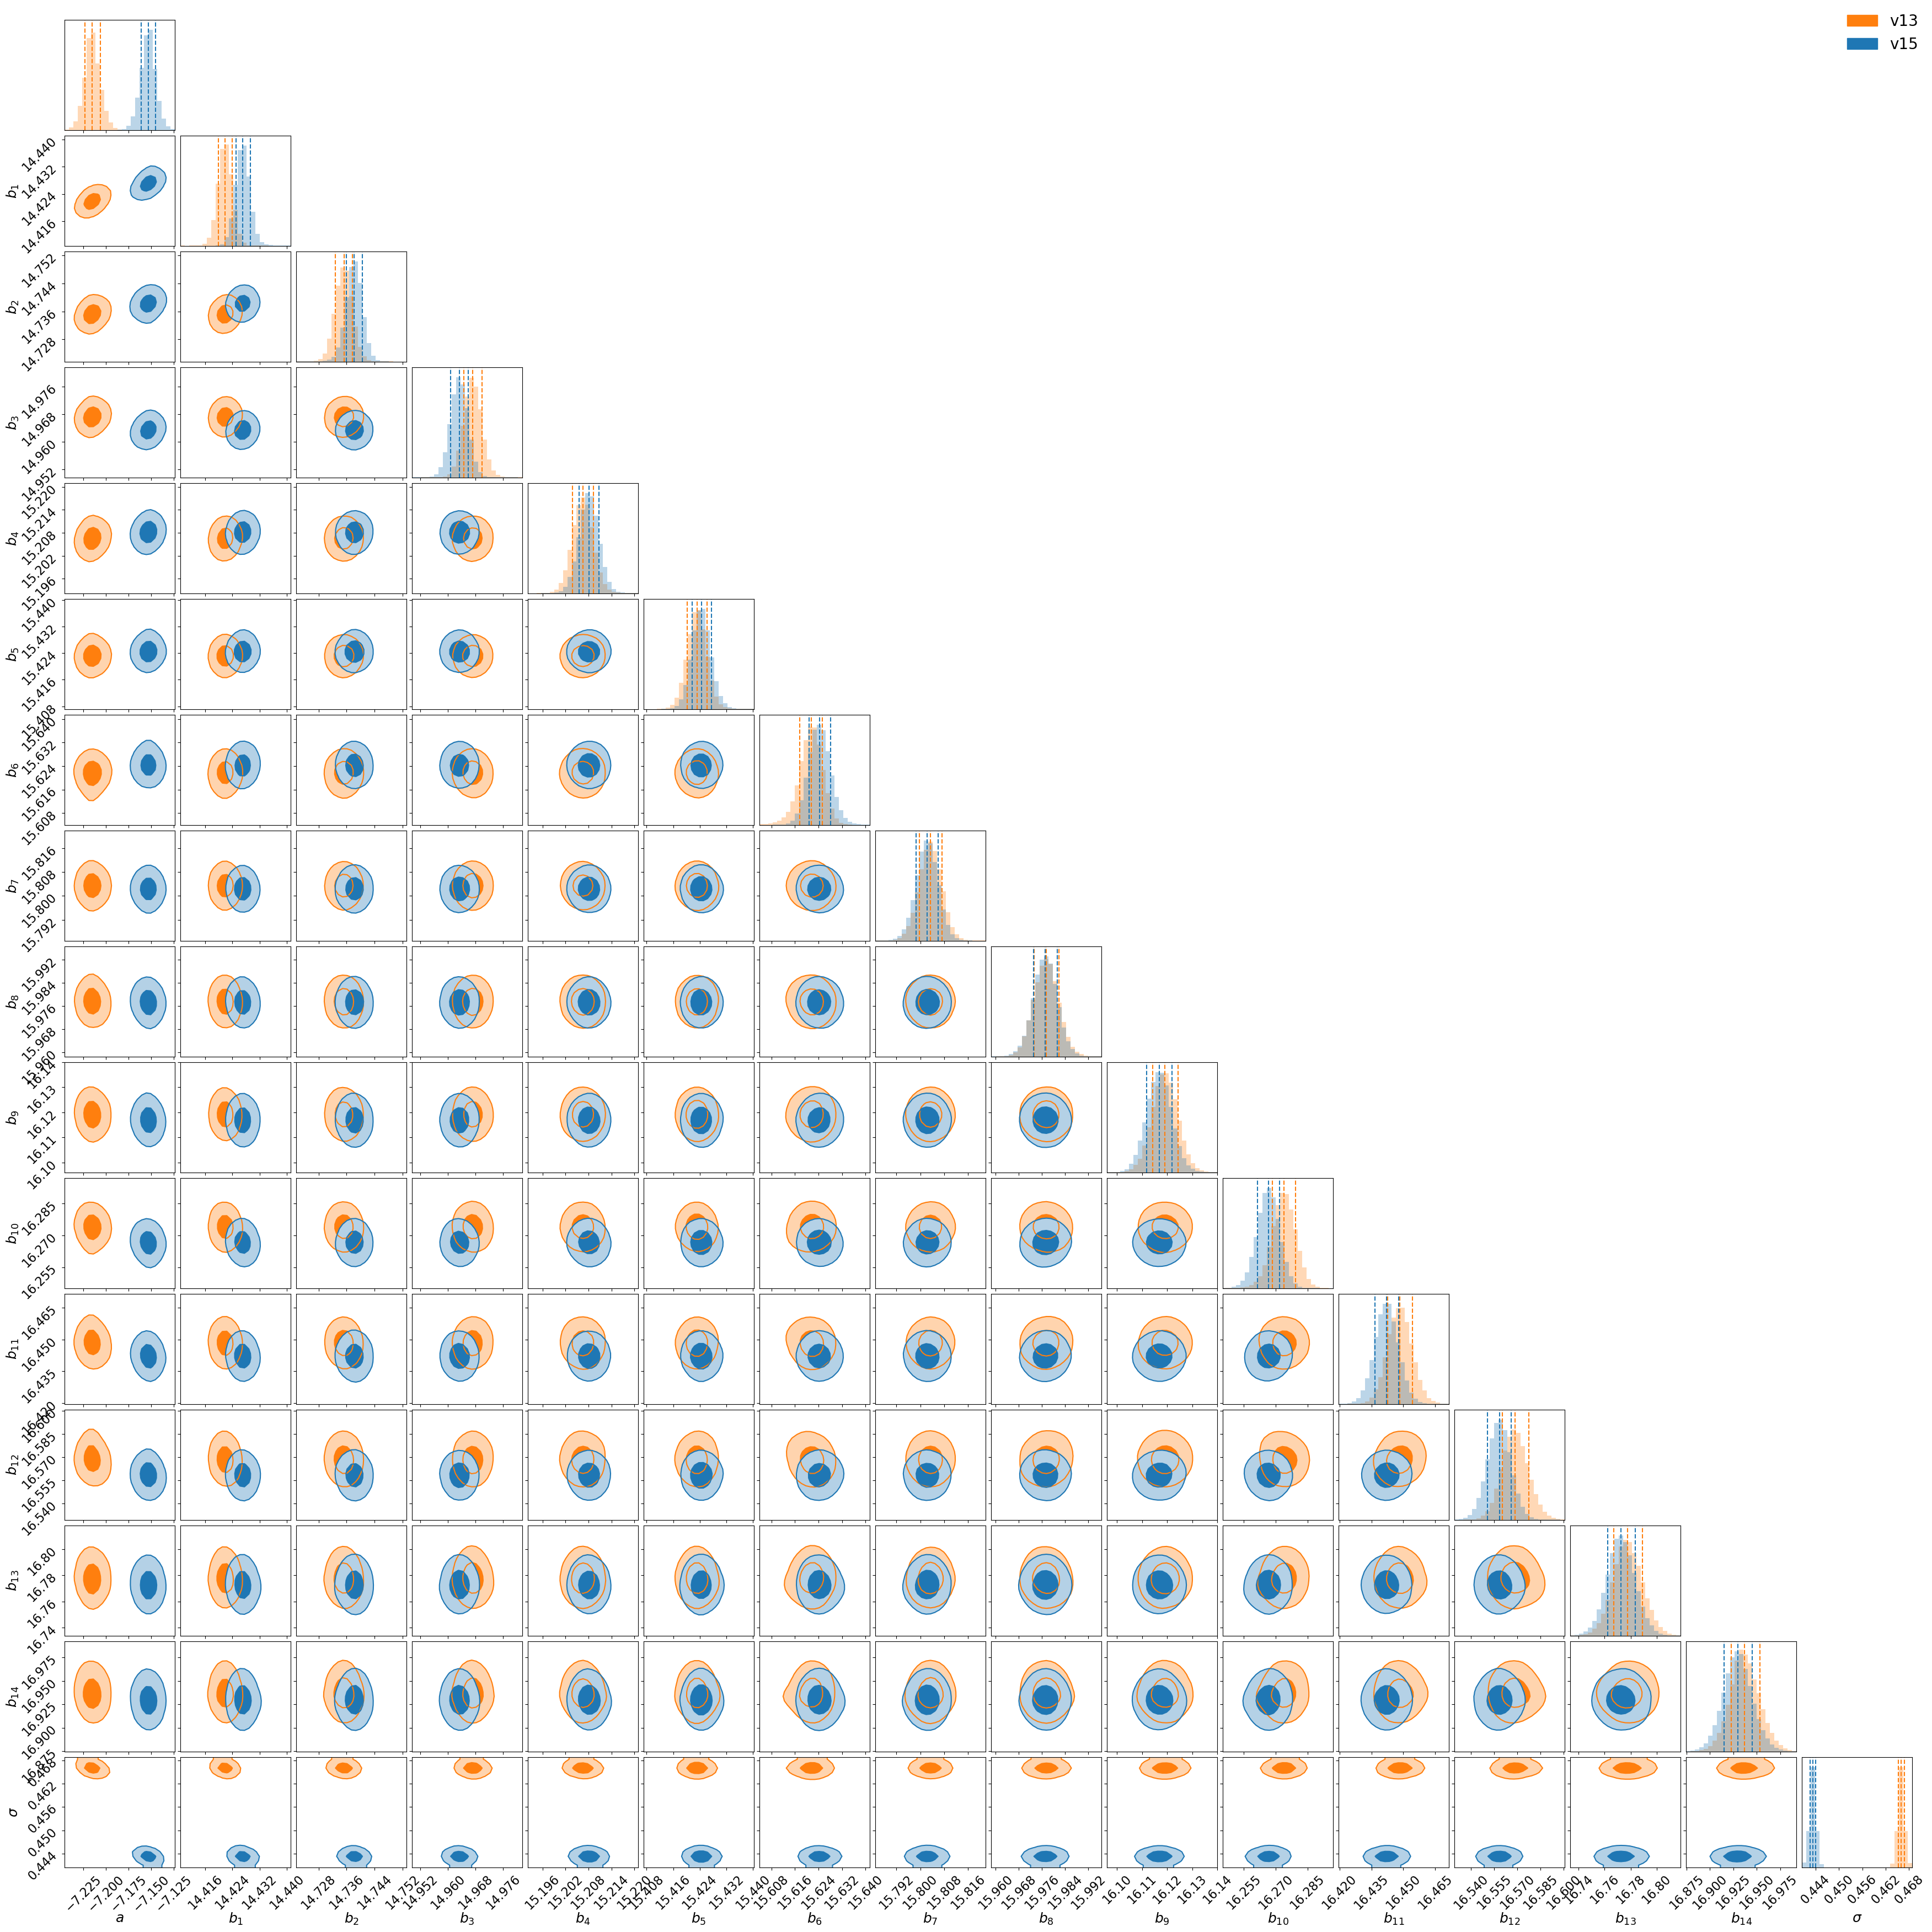

In [32]:
labels  = ['$a$']
labels += [f'$b_{{ {k+1} }}$' for k in np.arange(len(zbins1) - 1)]
labels += [r'$\sigma$']

# param_indices1 = [:]
# param_indices2 = [:]

color1 = 'tab:orange'
color2 = 'tab:blue'

fig = corner(tfr_samples1.T,#[:, param_indices1], 
             bins=25, 
             smooth=1, 
             range=limits,
             labels=labels, 
             label_kwargs={'fontsize':18}, 
             labelpad=0.1, 
             levels=(1-np.exp(-0.5), 1-np.exp(-2)), 
             quantiles=[0.16, 0.5, 0.84], 
             color=color1, 
             hist_kwargs={'histtype':'stepfilled', 'alpha':0.3}, 
             plot_datapoints=False, 
             fill_contours=True, 
             show_titles=False, 
             title_kwargs={'fontsize':18, 'loc':'left', 'pad':10}
            )

corner(tfr_samples2.T,#[:, param_indices2], 
       fig=fig, 
       bins=25, 
       smooth=1, 
       range=limits,
       levels=(1-np.exp(-0.5), 1-np.exp(-2)), 
       quantiles=[0.16, 0.5, 0.84], 
       color=color2, 
       hist_kwargs={'histtype':'stepfilled', 'alpha':0.3}, 
       plot_datapoints=False, 
       fill_contours=True
      )

for ax in fig.get_axes():
    ax.tick_params(axis='both', which='major', labelsize=16)

# Create custom legend handles
legend_handles = [Patch(color=color1, label='v13'), 
                  Patch(color=color2, label='v15')
                 ]

fig.legend(handles=legend_handles, loc='upper right', fontsize=20, frameon=False);

In [26]:
values1

array([-7.21502658, 14.42185969, 14.73524526, 14.967232  , 15.20656754,
       15.42319901, 15.62157029, 15.80343439, 15.97751433, 16.1191859 ,
       16.27388495, 16.44843635, 16.56861152, 16.77772423, 16.93699525,
        0.46594726])

In [27]:
values2

array([-7.15313959, 14.42707723, 14.73822031, 14.96336067, 15.20817383,
       15.42453004, 15.62434979, 15.80233274, 15.97716133, 16.11691015,
       16.26658104, 16.44223096, 16.55832556, 16.77274128, 16.92971179,
        0.44337503])

In [31]:
values3

array([-7.2123202 , 14.39810935, 14.7114006 , 14.94345972, 15.18268595,
       15.39873512, 15.59848646, 15.77933396, 15.95377383, 16.09528048,
       16.2501093 , 16.42286935, 16.54289671, 16.75422681, 16.91582052,
       16.85700764,  0.46591814])